In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('new_dataset.csv')

#veri seti türkçe olduğu için bütün terimleri ingilizceye çevirdim
data.columns = data.columns.str.replace(" ", "_")
data.rename(columns={
    'Yapı_Durumu': 'Building_Status',
    'Krediye_Uygunluk': 'Mortgage_Eligibility',
    'Isıtma_Tipi': 'Heating_Type',
    'Site_İçerisinde': 'Within_Complex',
    'Kullanım_Durumu': 'Occupancy_Status',
    'Yatırıma_Uygunluk': 'Investment_Suitability',
    'Banyo_Sayısı': 'Number_of_Bathrooms',
    'WC_Sayısı': 'Number_of_Toilets',
    'Eşya_Durumu': 'Furnishing_Status',
    'Tapu_Durumu': 'Deed_Status',
    'Balkon_Sayısı': 'Number_of_Balconies',
    'Tipi': 'Property_Type',
    'Unnamed:_0': 'Index',
    'Oda_Sayısı': 'Number_of_Rooms',
    'Kat_Oranı': 'Floor_Ratio',
    'Bulunduğu_Kat': 'Floor_Level',
    'Binanın_Kat_Sayısı': 'Total_Floors',
    'Fiyat': 'Price',
    'Brüt_Metrekare': 'Gross_Square_Meters',
    'Binanın_Yaşı': 'Building_Age',
    'Ilce': 'District',
    'Mahalle': 'Neighborhood',
    'Sehir': 'City'
}, inplace=True)

data = data.apply(lambda x: x.str.replace(r'0 \(Yeni\)', '0', regex=True) if x.dtype == "object" else x)
data = data.apply(lambda x: x.str.replace(r'Ve Üzeri', '', regex=True) if x.dtype == "object" else x)

#kullanılmayacak özelliklerin çıkarılması
columns_to_drop = [
    'Building_Status', 'Mortgage_Eligibility', 'Heating_Type', 
    'Within_Complex', 'Occupancy_Status', 'Investment_Suitability', 
    'Number_of_Bathrooms', 'Number_of_Toilets', 'Furnishing_Status', 'Deed_Status', 
    'Number_of_Balconies', 'Property_Type', 'Index'
]       
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

data


,Price,Number_of_Rooms,Floor_Level,Gross_Square_Meters,Building_Age,Total_Floors,City,District,Neighborhood
0,1240000,3,5,87,21,5,Adana,Ceyhan,Namık Kemal Mahallesi
1,4800000,3,1,120,11-15,1,Adana,Ceyhan,Şahin Özbilen Mahallesi
2,2250000,4,4,160,16-20,7,Adana,Ceyhan,Burhaniye Mahallesi
3,3000000,4,1,343,5-10,2,Adana,Ceyhan,Şahin Özbilen Mahallesi
4,2500000,3,1,269,5-10,1,Adana,Ceyhan,Muradiye Mahallesi
...,...,...,...,...,...,...,...,...,...
119878,1250000,3,4,105,5-10,4,Sakarya,Söğütlü,Gündoğan Mahallesi
119879,3300000,4,3,130,0,3,Sakarya,Söğütlü,Küçük Söğütlü Mahallesi
119880,1300000,5,2,140,21,3,Sakarya,Söğütlü,Küçük Söğütlü Mahallesi
119881,1250000,3,2,90,5-10,3,Sakarya,Söğütlü,Orta Mahallesi


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# feature engineering kısmı
data['Floor_Ratio'] = data['Floor_Level'] / data['Total_Floors']
data['Price_per_Square_Meter'] = data['Price'] / data['Gross_Square_Meters']

def convert_age(age):
    if '-' in str(age):
        age_range = age.split('-')
        return (int(age_range[0]) + int(age_range[1])) / 2
    else:
        return float(age)

data['Building_Age'] = data['Building_Age'].apply(convert_age)
data['Newness_Score'] = 1 / (data['Building_Age'] + 1)

# kat seviyesi hesabı
def floor_level_category(row):
    if row['Floor_Ratio'] <= 0.3:
        return 0
    elif row['Floor_Ratio'] <= 0.7:
        return 1
    else:
        return 2

data['Floor_Level_Category'] = data.apply(floor_level_category, axis=1)

# düzenleme sonrası columnların silinmesi
data = data.drop(['Floor_Level', 'Total_Floors', 'Building_Age', 'Gross_Square_Meters', 'Floor_Ratio'], axis=1)
data
data

,Price,Number_of_Rooms,City,District,Neighborhood,Price_per_Square_Meter,Newness_Score,Floor_Level_Category
0,1240000,-0.619940,Adana,Ceyhan,Namık Kemal Mahallesi,14252.873563,0.045455,2
1,4800000,-0.619940,Adana,Ceyhan,Şahin Özbilen Mahallesi,40000.000000,0.071429,2
2,2250000,0.412185,Adana,Ceyhan,Burhaniye Mahallesi,14062.500000,0.052632,1
3,3000000,0.412185,Adana,Ceyhan,Şahin Özbilen Mahallesi,8746.355685,0.117647,1
4,2500000,-0.619940,Adana,Ceyhan,Muradiye Mahallesi,9293.680297,0.117647,2
...,...,...,...,...,...,...,...,...
119878,1250000,-0.619940,Sakarya,Söğütlü,Gündoğan Mahallesi,11904.761905,0.117647,2
119879,3300000,0.412185,Sakarya,Söğütlü,Küçük Söğütlü Mahallesi,25384.615385,1.000000,2
119880,1300000,1.444310,Sakarya,Söğütlü,Küçük Söğütlü Mahallesi,9285.714286,0.045455,1
119881,1250000,-0.619940,Sakarya,Söğütlü,Orta Mahallesi,13888.888889,0.117647,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# target encoding mahalle ve ilçe için
district_means = data.groupby('District')['Price'].mean()
data['District_encoded'] = data['District'].map(district_means)

neighborhood_means = data.groupby('Neighborhood')['Price'].mean()
data['Neighborhood_encoded'] = data['Neighborhood'].map(neighborhood_means)

# one hot encoding şehirler için
city_dummies = pd.get_dummies(data, columns=['City'], drop_first=False, prefix='City')
data = pd.concat([city_dummies], axis=1)

data.drop(['District', 'Neighborhood'], axis=1, inplace=True)
data


,Price,Number_of_Rooms,Price_per_Square_Meter,Newness_Score,Floor_Level_Category,District_encoded,Neighborhood_encoded,City_Adana,City_Afyonkarahisar,City_Ankara,...,City_Samsun,City_Sivas,City_Tekirdağ,City_Trabzon,City_Van,City_Yalova,City_Çanakkale,City_İstanbul,City_İzmir,City_Şanlıurfa
0,1240000,-0.619940,14252.873563,0.045455,2,2343500.0,2.993677e+06,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4800000,-0.619940,40000.000000,0.071429,2,2343500.0,2.770000e+06,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2250000,0.412185,14062.500000,0.052632,1,2343500.0,4.870000e+06,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3000000,0.412185,8746.355685,0.117647,1,2343500.0,2.770000e+06,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2500000,-0.619940,9293.680297,0.117647,2,2343500.0,2.188275e+06,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119878,1250000,-0.619940,11904.761905,0.117647,2,2650000.0,6.911111e+06,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119879,3300000,0.412185,25384.615385,1.000000,2,2650000.0,2.633333e+06,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119880,1300000,1.444310,9285.714286,0.045455,1,2650000.0,2.633333e+06,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119881,1250000,-0.619940,13888.888889,0.117647,1,2650000.0,2.387792e+06,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#scale edilecek columnların belirlenmesi
columns_to_scale = [
    'Number_of_Rooms', 
    'Price_per_Square_Meter', 
    'Newness_Score', 
    'Floor_Level_Category', 
    'City_Adana', 'City_Afyonkarahisar', 'City_Ankara', 'City_Antalya', 
    'City_Aydin', 'City_Balikesir', 'City_Bursa', 'City_Denizli', 
    'City_Diyarbakir', 'City_Edirne', 'City_Eskisehir', 'City_Gaziantep', 
    'City_Kahramanmaras', 'City_Kayseri', 'City_Kocaeli', 'City_Konya', 
    'City_Kirklareli', 'City_Manisa', 'City_Mersin', 'City_Mugla', 
    'City_Ordu', 'City_Sakarya', 'City_Samsun', 'City_Sivas', 
    'City_Tekirdag', 'City_Trabzon', 'City_Van', 'City_Yalova', 
    'City_Canakkale', 'City_Istanbul', 'City_Izmir', 'City_Sanliurfa'
]
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
data

,Price,Number_of_Rooms,Price_per_Square_Meter,Newness_Score,Floor_Level_Category,District_encoded,Neighborhood_encoded,City_Adana,City_Afyonkarahisar,City_Ankara,...,City_Samsun,City_Sivas,City_Tekirdağ,City_Trabzon,City_Van,City_Yalova,City_Çanakkale,City_İstanbul,City_İzmir,City_Şanlıurfa
0,1240000,-0.619940,-0.642071,-0.808856,1.188265,2343500.0,2.993677e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
1,4800000,-0.619940,0.982191,-0.744132,1.188265,2343500.0,2.770000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
2,2250000,0.412185,-0.654081,-0.790972,-0.084055,2343500.0,4.870000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
3,3000000,0.412185,-0.989451,-0.628961,-0.084055,2343500.0,2.770000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
4,2500000,-0.619940,-0.954923,-0.628961,1.188265,2343500.0,2.188275e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119878,1250000,-0.619940,-0.790202,-0.628961,1.188265,2650000.0,6.911111e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119879,3300000,0.412185,0.060177,1.569758,1.188265,2650000.0,2.633333e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119880,1300000,1.444310,-0.955425,-0.808856,-0.084055,2650000.0,2.633333e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119881,1250000,-0.619940,-0.665033,-0.628961,-0.084055,2650000.0,2.387792e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651


In [ ]:
from sklearn.model_selection import train_test_split
#train test ayrımı
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
data

,Price,Number_of_Rooms,Price_per_Square_Meter,Newness_Score,Floor_Level_Category,District_encoded,Neighborhood_encoded,City_Adana,City_Afyonkarahisar,City_Ankara,...,City_Samsun,City_Sivas,City_Tekirdağ,City_Trabzon,City_Van,City_Yalova,City_Çanakkale,City_İstanbul,City_İzmir,City_Şanlıurfa
0,1240000,-0.619940,-0.642071,-0.808856,1.188265,2343500.0,2.993677e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
1,4800000,-0.619940,0.982191,-0.744132,1.188265,2343500.0,2.770000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
2,2250000,0.412185,-0.654081,-0.790972,-0.084055,2343500.0,4.870000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
3,3000000,0.412185,-0.989451,-0.628961,-0.084055,2343500.0,2.770000e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
4,2500000,-0.619940,-0.954923,-0.628961,1.188265,2343500.0,2.188275e+06,6.730880,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119878,1250000,-0.619940,-0.790202,-0.628961,1.188265,2650000.0,6.911111e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119879,3300000,0.412185,0.060177,1.569758,1.188265,2650000.0,2.633333e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119880,1300000,1.444310,-0.955425,-0.808856,-0.084055,2650000.0,2.633333e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651
119881,1250000,-0.619940,-0.665033,-0.628961,-0.084055,2650000.0,2.387792e+06,-0.148569,-0.06186,-0.319307,...,-0.159852,-0.073434,-0.182521,-0.102773,-0.067016,-0.090739,-0.077894,-0.548311,-0.31872,-0.146651


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [ ]:
def calculate_accuracy(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape
    return accuracy

In [ ]:
# model tanımlaması
models = {
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100),
    "Linear Regression": LinearRegression()
}

In [ ]:
results = []
# model eğitimi ve test
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "Accuracy (%)": accuracy
    })

results_df = pd.DataFrame(results)

In [29]:
print("Model Performance Metrics:")
print(results_df.to_string(index=False))

Model Performance Metrics:
            Model           MAE          MSE          RMSE       R2  Accuracy (%)
    Random Forest 344960.839588 4.301565e+11 655863.163026 0.905863     89.074929
          XGBoost 370285.234008 4.302794e+11 655956.874820 0.905836     88.021853
Linear Regression 537135.782993 8.051653e+11 897310.014267 0.823794     80.883228


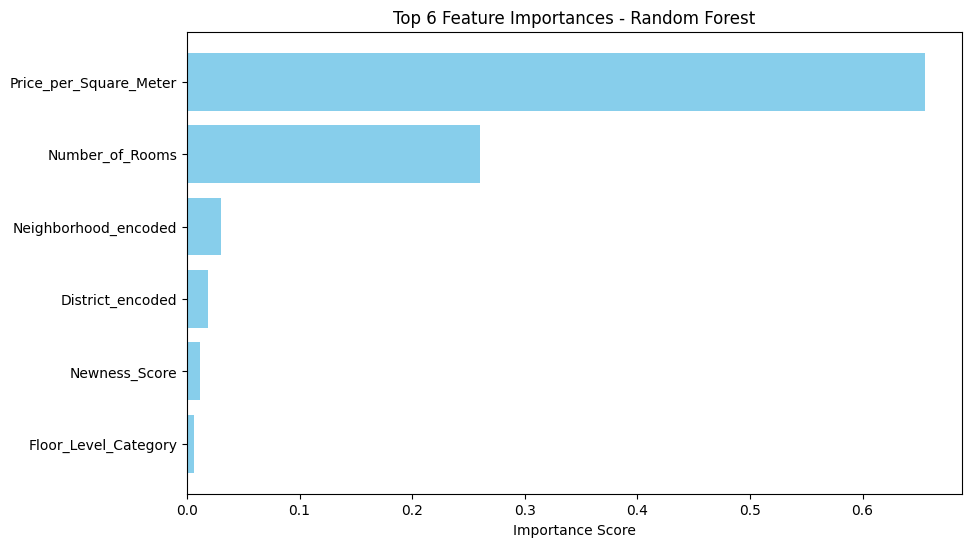

In [ ]:
# random forest grafiği
importances = models["Random Forest"].feature_importances_
features = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# en önemli 6 özellik ekliyorum çünkü etkisi az olan bütün featureler gözüksün istemiyorum
top_n = 6
top_features = [features[i] for i in sorted_indices[:top_n]]
top_importances = importances[sorted_indices[:top_n]]
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_importances, align='center', color='skyblue')
plt.yticks(range(top_n), top_features)
plt.title("Top 6 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

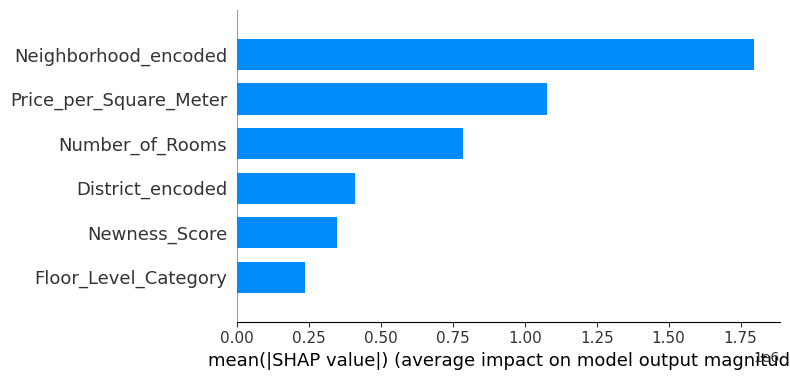

In [ ]:
# xgboos tablosu
explainer = shap.TreeExplainer(models["XGBoost"])
shap_values = explainer.shap_values(X_test)
# en önemli 6 özellik ekliyorum çünkü etkisi az olan bütün featureler gözüksün istemiyorum
shap_importances = np.abs(shap_values).mean(axis=0)
top_shap_indices = np.argsort(shap_importances)[::-1][:top_n]
top_shap_features = X_test.columns[top_shap_indices]
shap.summary_plot(shap_values[:, top_shap_indices], X_test.iloc[:, top_shap_indices], plot_type="bar", show=True)


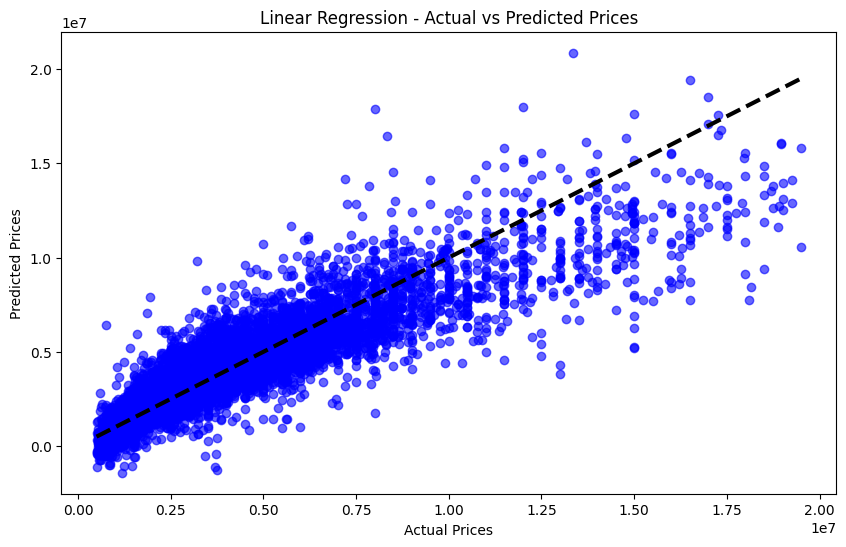

In [ ]:
# lineer regresyon tablosu
linear_model = models["Linear Regression"]
y_pred_linear = linear_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted Prices")
plt.show()